**ETAPA 1. Descripción del Proyecto**

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [949]:
# Cargar todas las librerías
from scipy import stats as st
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats

**En este sección reuní la totalidad de los dataframe, la función .read_csv permite leer cada uno de los archivos cargados.**

In [950]:
# Cargar los archivos de datos de los diferentes DataFrames
df_ab_marketing_events = pd.read_csv('./datasets/ab_project_marketing_events_us.csv')
df_ab_new_users = pd.read_csv('./datasets/final_ab_new_users_upd_us.csv')
df_ab_events = pd.read_csv('./datasets/final_ab_events_upd_us.csv')
df_ab_participants = pd.read_csv('./datasets/final_ab_participants_upd_us.csv')

**Uso las funciones info() y head() para explorar visualmente cada dataframe con el fin de analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

**1. Eventos de marketing**

In [951]:
#Imprimir la información general/resumida sobre el DataFrame eventos de marketing
df_ab_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [952]:
# Imprimir una muestra de los datos para los eventos de marketing
df_ab_marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


**2. Nuevos usuarios**

In [953]:
# Imprimir la información general/resumida sobre el DataFrame nuevos usuarios
df_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [954]:
# Imprimir una muestra de los datos para los nuevos usuarios
df_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


**3. Eventos**

In [955]:
#Imprimir la información general/resumida sobre el DataFrame eventos
df_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [956]:
# Imprimir una muestra de los datos para los eventos 
df_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


**4. Participantes**

In [957]:
#Imprimir la información general/resumida sobre el DataFrame participantes
df_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [958]:
# Imprimir una muestra de los datos para los eventos 
df_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya: identificar los registros duplicados y en su caso si fuera necesario eliminar dichos registros, identificar los valores ausentes y en su caso completar dichos valores,  verificar y en su caso corregir los tipos de datos de cada columna, y finalmente enriquecer las estructuras de datos en los casos donde sea requerido para columnas de tipo DATETIME.**

**1. Eventos de marketing**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME EVENTOS DE MARKETING**

a) Revisar y eliminar duplicados.

b) Calcular el número de valores ausentes.

c) Preparar los datos de la columna START DT que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d) Preparar los datos de la columna FINISH DT que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

**Revisar y eliminar duplicados**

In [959]:
# Mostrar el total de filas del dataFrame 
df_ab_marketing_events.shape[0]

14

In [960]:
# Revisar si hay valores duplicados en el dataframe
df_ab_marketing_events.duplicated().sum()

0

In [961]:
# Calcular el porcentaje de filas duplicadas 
print("El porcentaje de filas duplicadas es: " +
      f"{(df_ab_marketing_events.duplicated().sum() / df_ab_marketing_events.shape[0]) * 100:.2f}%")

El porcentaje de filas duplicadas es: 0.00%


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe EVENTOS DE MARKETING no cuenta con información de este tipo en ninguna de sus columnas.

In [962]:
# Calcular el número de valores ausentes
df_ab_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

**Preparar los datos de la columna START DT**

In [963]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_ab_marketing_events['start_dt'] = pd.to_datetime(df_ab_marketing_events['start_dt'])

In [964]:
# Imprimir la información general/resumida actualizada
df_ab_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 580.0+ bytes


**Preparar los datos de la columna FINISH DT**

In [965]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_ab_marketing_events['finish_dt'] = pd.to_datetime(df_ab_marketing_events['finish_dt'])

In [966]:
# Imprimir la información general/resumida actualizada
df_ab_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


**2. Nuevos usuarios**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME NUEVOS USUARIOS**

a) Revisar y eliminar duplicados.

b) Calcular el número de valores ausentes.

c) Preparar los datos de la columna FIRST DATE que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d) Filtrar los datos.

**Revisar y eliminar duplicados**

In [967]:
# Mostrar el total de filas del dataFrame 
df_ab_new_users.shape[0]

58703

In [968]:
# Revisar si hay valores duplicados en el dataframe 
df_ab_new_users.duplicated().sum()

0

In [969]:
# Calcular el porcentaje de filas duplicadas 
print("El porcentaje de filas duplicadas es: " +
      f"{(df_ab_new_users.duplicated().sum() / df_ab_new_users.shape[0]) * 100:.2f}%")

El porcentaje de filas duplicadas es: 0.00%


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe NUEVOS USUARIOS no cuenta con información de este tipo en ninguna de sus columnas.

In [970]:
# Calcular el número de valores ausentes
df_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

**Preparar los datos de la columna FIRST DATE**

In [971]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_ab_new_users['first_date'] = pd.to_datetime(df_ab_new_users['first_date'])

In [972]:
# Imprimir la información general/resumida actualizada
df_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


**Filtrar los datos**

Es ideal en está fase filtrar los datos conforme a los requerimientos del proyecto para que ya estén listos para el análisis exploratorio. 

Condiciones: 

- region == EU
- first_date >= "2020-12-07" & first_date <= "2020-12-21" (todos los usuarios que se registraron en la tienda en línea)

In [973]:
# Filtrar nuevos usuarios de la región EU registrados entre el 7 y el 21 de diciembre de 2020
df_ab_new_users_period=df_ab_new_users.query(
    'region == "EU" & first_date >= "2020-12-07" & first_date <= "2020-12-21"').reset_index(drop=True)

# Imprimir una muestra de los datos
df_ab_new_users_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39466 entries, 0 to 39465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     39466 non-null  object        
 1   first_date  39466 non-null  datetime64[ns]
 2   region      39466 non-null  object        
 3   device      39466 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


**3. Eventos**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME EVENTOS**

a) Revisar y eliminar duplicados.

b) Calcular el número de valores ausentes.

c) Preparar los datos de la columna EVENT DT  que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d) Enriquecer los datos a partir de la columna EVENT DT para generar la columna EVENT DATE.

e) Filtrar los datos.

**Revisar y eliminar duplicados**

In [974]:
# Mostrar el total de filas del dataFrame 
df_ab_events.shape[0]

423761

In [975]:
# Revisar si hay valores duplicados en el dataframe
df_ab_events.duplicated().sum()

0

In [976]:
# Calcular el porcentaje de filas duplicadas 
print("El porcentaje de filas duplicadas es: " +
      f"{(df_ab_events.duplicated().sum() / df_ab_events.shape[0]) * 100:.2f}%")

El porcentaje de filas duplicadas es: 0.00%


**Tratamiento de los valores ausentes**

*Como se puede observar en el dataframe objeto de estudio se tienen valores ausentes en una de las cuatro columnas que conforma esta estructura de datos, para ser exacto es:*  

- **details** con 363447 valores ausentes que corresponden al 85.77% del total de filas del dataframe.

Al no ser dicha columna **una variable determinante dentro del análisis a realizar, no altera para nada el resultado final al que se desea llegar** por lo motivo no realize ningún tratamiento para este tipo de valores.

Concluyó comentando que en nuestro caso no se puede investigar por qué esos valores están ausentes. Pero en la vida laboral a veces estos valores pueden revelar problemas sistemáticos en la recolección de datos, es decir, errores que ocurren en un proceso de recopilación de la información. 

In [977]:
# Mostrar el total de filas del dataFrame
df_ab_events.shape[0]

423761

In [978]:
# Calcular el número de valores ausentes
df_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [979]:
# Calcular el porcentaje de valores ausentes para la columna 'details'
print("El porcentaje de valores ausentes en la columna 'details' es: " +
      f"{(df_ab_events['details'].isna().sum() / df_ab_events.shape[0]) * 100:.2f}%")

El porcentaje de valores ausentes en la columna 'details' es: 85.77%


**Preparar los datos de la columna EVENT DT**

In [980]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_ab_events['event_dt'] = pd.to_datetime(df_ab_events['event_dt'])

In [981]:
# Imprimir la información general/resumida actualizada
df_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


**Enriquecer los datos**

In [982]:
# Enriquecer a partir de la columna event dt por día y convertir de tipo object a tipo datetime64[ns] la columna
df_ab_events['event_date'] = df_ab_events['event_dt'].dt.date
df_ab_events['event_date'] = pd.to_datetime(df_ab_events['event_date'], format='%Y-%m-%d')

In [983]:
# Imprimir una muestra de los datos para los eventos después de enriquecer el dataframe
df_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
 4   event_date  423761 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 16.2+ MB


**Filtrar los datos**

Es ideal en está fase filtrar los datos conforme a los requerimientos del proyecto para que ya estén listos para el análisis exploratorio.

Condiciones:
    event_date >= "2020-12-07" & <= event_date "2020-12-21" (todos los usuarios que se registraron en la tienda en línea)

In [984]:
# Filtrar eventos ocurridos entre el 7 de diciembre de 2020 y el 1 de enero de 2021
df_ab_events_period = df_ab_events.query('event_date >= "2020-12-07" & event_date <= "2021-01-01"').reset_index(drop=True)

# Imprimir una muestra de los datos
df_ab_events_period.head()

,user_id,event_dt,event_name,details,event_date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07


**4. Participantes**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME PARTICIPANTES**

a) Revisar y eliminar duplicados.

b) Calcular el número de valores ausentes.

**Revisar y eliminar duplicados**

In [985]:
# Mostrar el total de filas del dataFrame 
df_ab_participants.shape[0]

14525

In [986]:
# Revisar si hay valores duplicados en el dataframe
df_ab_participants.duplicated().sum()

0

In [987]:
# Calcular el porcentaje de filas duplicadas 
print("El porcentaje de filas duplicadas es: " +
      f"{(df_ab_participants.duplicated().sum() / df_ab_participants.shape[0]) * 100:.2f}%")

El porcentaje de filas duplicadas es: 0.00%


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe PARTICIPANTS no cuenta con información de este tipo en ninguna de sus columnas.

In [988]:
# Calcular el número de valores ausentes
df_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

**ETAPA 3. Análisis exploratorio**

# Estudia la conversión en las diferentes etapas del embudo.

In [989]:
# Filtrar los usuarios que están en el grupo A 
group_a_users = df_ab_participants[df_ab_participants['group'] == 'A']['user_id']
group_a_users

0        D1ABA3E2887B6A73
1        A7A3664BD6242119
2        DABC14FDDFADD29E
3        04988C5DF189632E
4        4FF2998A348C484F
               ...       
14516    96304D5B53694096
14518    A1281767A2983E4D
14521    3DE51B726983B657
14522    F501F79D332BE86C
14523    63FBE257B05F2245
Name: user_id, Length: 8214, dtype: object

In [990]:
# Filtrar los usuarios que están en el grupo B
group_b_users = df_ab_participants[df_ab_participants['group'] == 'B']['user_id']
group_b_users

10       CD74C3D22FFC09C2
13       50AA023EF325BCA1
15       EAFB9027A27D510C
17       5D5E6EE92AF6E9E0
21       52E7B7DC39F52987
               ...       
14513    06CB5B54FDFEA69F
14517    60A2B3B987457ECE
14519    4155D795096E6CFE
14520    1D302F8688B91781
14524    79F9ABFB029CF724
Name: user_id, Length: 6311, dtype: object

In [991]:
# Filtrar los eventos de las tres etapas del embudo
events_of_interest = ['product_page', 'product_cart', 'purchase']
df_filtered_events = df_ab_events_period[df_ab_events_period['event_name'].isin(events_of_interest)]

# Imprimir una muestra de los datos
df_filtered_events.head()

,user_id,event_dt,event_name,details,event_date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07


In [992]:
# Filtrar los eventos solo para usuarios del grupo A
df_filtered_events_group_a = df_filtered_events[df_filtered_events['user_id'].isin(group_a_users)]

# Imprimir una muestra de los datos
df_filtered_events_group_a.head()

,user_id,event_dt,event_name,details,event_date
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07
13,0313C457F07C339E,2020-12-07 13:10:48,purchase,9.99,2020-12-07
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07


In [993]:
# Filtrar los eventos solo para usuarios del grupo B
df_filtered_events_group_b = df_filtered_events[df_filtered_events['user_id'].isin(group_b_users)]

# Imprimir una muestra de los datos
df_filtered_events_group_b.head()

,user_id,event_dt,event_name,details,event_date
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07
25,C39E95E709714A06,2020-12-07 09:07:20,purchase,4.99,2020-12-07
30,78B3AFBB700310CC,2020-12-07 23:44:09,purchase,4.99,2020-12-07
31,80CEAF824A1F3E28,2020-12-07 15:54:06,purchase,499.99,2020-12-07


In [994]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento 'product_page' en el grupo A
group_a_product_page_users = df_filtered_events_group_a[df_filtered_events_group_a['event_name'] == 'product_page'][
    'user_id'].unique()

group_a_product_page_users

array(['D72A72121175D8BE', '2E1BF1D4C37EA01F', 'DD4352CDCF8C3D57', ...,
       '165AFCBF42C043F8', '54E7F36C0E976E24', '2DDC948BD76ABC57'],
      dtype=object)

In [995]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento 'product_page' en el grupo B
group_b_product_page_users = df_filtered_events_group_b[df_filtered_events_group_b['event_name'] == 'product_page'][
    'user_id'].unique()

group_b_product_page_users

array(['50734A22C0C63768', '96F27A054B191457', 'DD4352CDCF8C3D57', ...,
       '32A46395A711AEFF', '7E43EB2E03A33E78', 'B8B679DEE9F2CA06'],
      dtype=object)

In [996]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento'product_cart' después de 'product_page' en el grupo A
group_a_product_cart_users = df_filtered_events_group_a[df_filtered_events_group_a['event_name'] == 'product_cart']
group_a_product_cart_users = group_a_product_cart_users[group_a_product_cart_users['user_id'].isin(
    group_a_product_page_users)]['user_id'].unique()

group_a_product_cart_users

array(['2E1BF1D4C37EA01F', '05AAB890585C38F7', '7BFC18C3391016B3', ...,
       '2D01A2E2F8B0EABB', '3FBB2AE89FE71F59', '165AFCBF42C043F8'],
      dtype=object)

In [997]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento'product_cart' después de 'product_page' en el grupo B
group_b_product_cart_users = df_filtered_events_group_b[df_filtered_events_group_b['event_name'] == 'product_cart']
group_b_product_cart_users = group_b_product_cart_users[group_b_product_cart_users['user_id'].isin(
    group_b_product_page_users)]['user_id'].unique()

group_b_product_cart_users

array(['50734A22C0C63768', '7D1BFB181017EB46', '3E90A4CA2F922CE4', ...,
       '327111639FEF567F', '2A3CC2DB6F886374', 'B8B679DEE9F2CA06'],
      dtype=object)

In [998]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento 'purchase' después de 'product_cart' en el grupo A
group_a_purchase_users = df_filtered_events_group_a[df_filtered_events_group_a['event_name'] == 'purchase']
group_a_purchase_users = group_a_purchase_users[group_a_purchase_users['user_id'].isin(group_a_product_cart_users)][
    'user_id'].unique()

In [999]:
# Contar cuántos usuarios pasaron por cada etapa del embudo
# Usuarios que realizaron el evento 'purchase' después de 'product_cart' en el grupo B
group_b_purchase_users = df_filtered_events_group_b[df_filtered_events_group_b['event_name'] == 'purchase']
group_b_purchase_users = group_b_purchase_users[group_b_purchase_users['user_id'].isin(group_b_product_cart_users)][
    'user_id'].unique()

In [1000]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento product_page en el grupo A
group_a_total_users = len(group_a_users)
group_a_conversion_page = len(group_a_product_page_users) / group_a_total_users

group_a_conversion_page

0.6340394448502557

In [1001]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento product_page en el grupo B
group_b_total_users = len(group_b_users)
group_b_conversion_page = len(group_b_product_page_users) / group_b_total_users

group_b_conversion_page

0.6315956266835684

In [1002]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento product_cart en el grupo A
group_a_conversion_cart = len(group_a_product_cart_users) / len(group_a_product_page_users)

group_a_conversion_cart

0.3147081413210445

In [1003]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento product_cart en el grupo B
group_b_conversion_cart = len(group_b_product_cart_users) / len(group_b_product_page_users)

group_b_conversion_cart

0.3299046663321626

In [1004]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento purchase en el grupo A
group_a_conversion_purchase = len(group_a_purchase_users) / len(group_a_product_cart_users)

group_a_conversion_purchase

0.3410616229408176

In [1005]:
# Calcular la tasa de conversión para cada grupo en cada etapa del embudo
# Conversión en el evento purchase en el grupo B
group_b_conversion_purchase = len(group_b_purchase_users) / len(group_b_product_cart_users)

group_b_conversion_purchase

0.3300380228136882

In [1006]:
# Mostrar los resultados de la conversión por grupo y evento
conversion_results = {
    'group': ['A', 'B'],
    'product_page_conversion': [f'{group_a_conversion_page * 100:.1f}%', f'{group_b_conversion_page * 100:.1f}%'],
    'product_cart_conversion': [f'{group_a_conversion_cart * 100:.1f}%', f'{group_b_conversion_cart * 100:.1f}%'],
    'purchase_conversion': [f'{group_a_conversion_purchase * 100:.1f}%', f'{group_b_conversion_purchase * 100:.1f}%']
}

df_conversion_results = pd.DataFrame(conversion_results)

# Imprimir los datos
df_conversion_results

,group,product_page_conversion,product_cart_conversion,purchase_conversion
0,A,63.4%,31.5%,34.1%
1,B,63.2%,33.0%,33.0%


In [1007]:
# Nombres de las etapas del embudo
stages = ['Product Page', 'Product Cart', 'Purchase']

# Tasas de conversión reales 
group_a_rates = [
    group_a_conversion_page * 100,
    group_a_conversion_cart * 100,
    group_a_conversion_purchase * 100
]

group_b_rates = [
    group_b_conversion_page * 100,
    group_b_conversion_cart * 100,
    group_b_conversion_purchase * 100
]

# Crear gráfico tipo funnel apilado
fig = go.Figure()

fig.add_trace(go.Funnel(
    name='Group A',
    orientation='h',
    y=stages,
    x=group_a_rates,
    text=[f'{v:.1f}%' for v in group_a_rates],
    textposition='inside',
    marker={"color": "royalblue"}
))

fig.add_trace(go.Funnel(
    name='Group B',
    orientation='h',
    y=stages,
    x=group_b_rates,
    text=[f'{v:.1f}%' for v in group_b_rates],
    textposition='inside',
    marker={"color": "tomato"}
))

fig.update_layout(
    title='Funnel Conversion Comparison: Group A vs Group B',
    funnelmode='stack'  
)

fig.show()

**Conclusión**

La conversión desde **Product Page** hasta **Purchase** es **ligeramente mayor en el grupo A,** a pesar de que el grupo B parecía más prometedor en la mitad del embudo. 


Esto podría indicar que el grupo B **atrae más fácilmente,** pero quizás hay **fricción en la compra final**. Mientras que el grupo A **es más intencional**, es decir, menos usuarios llegan, pero los que lo hacen están más dispuestos a comprar.

# ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [1008]:
# Unir los dataframes para obtener el grupo de cada usuario
merged_events = pd.merge(df_ab_events_period, df_ab_participants, on='user_id', how='inner')

# Agrupar por usuario y grupo, y contar los eventos
events_per_user = merged_events.groupby(['user_id', 'group'])['event_name'].count().reset_index()
events_per_user.rename(columns={'event_name': 'event_count'}, inplace=True)

# Imprimir una muestra de los datos
events_per_user.head()

,user_id,group,event_count
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,12
2,0010A1C096941592,A,12
3,001E72F50D1C48FA,B,6
4,002412F1EB3F6E38,A,6


*Con valores atípicos*

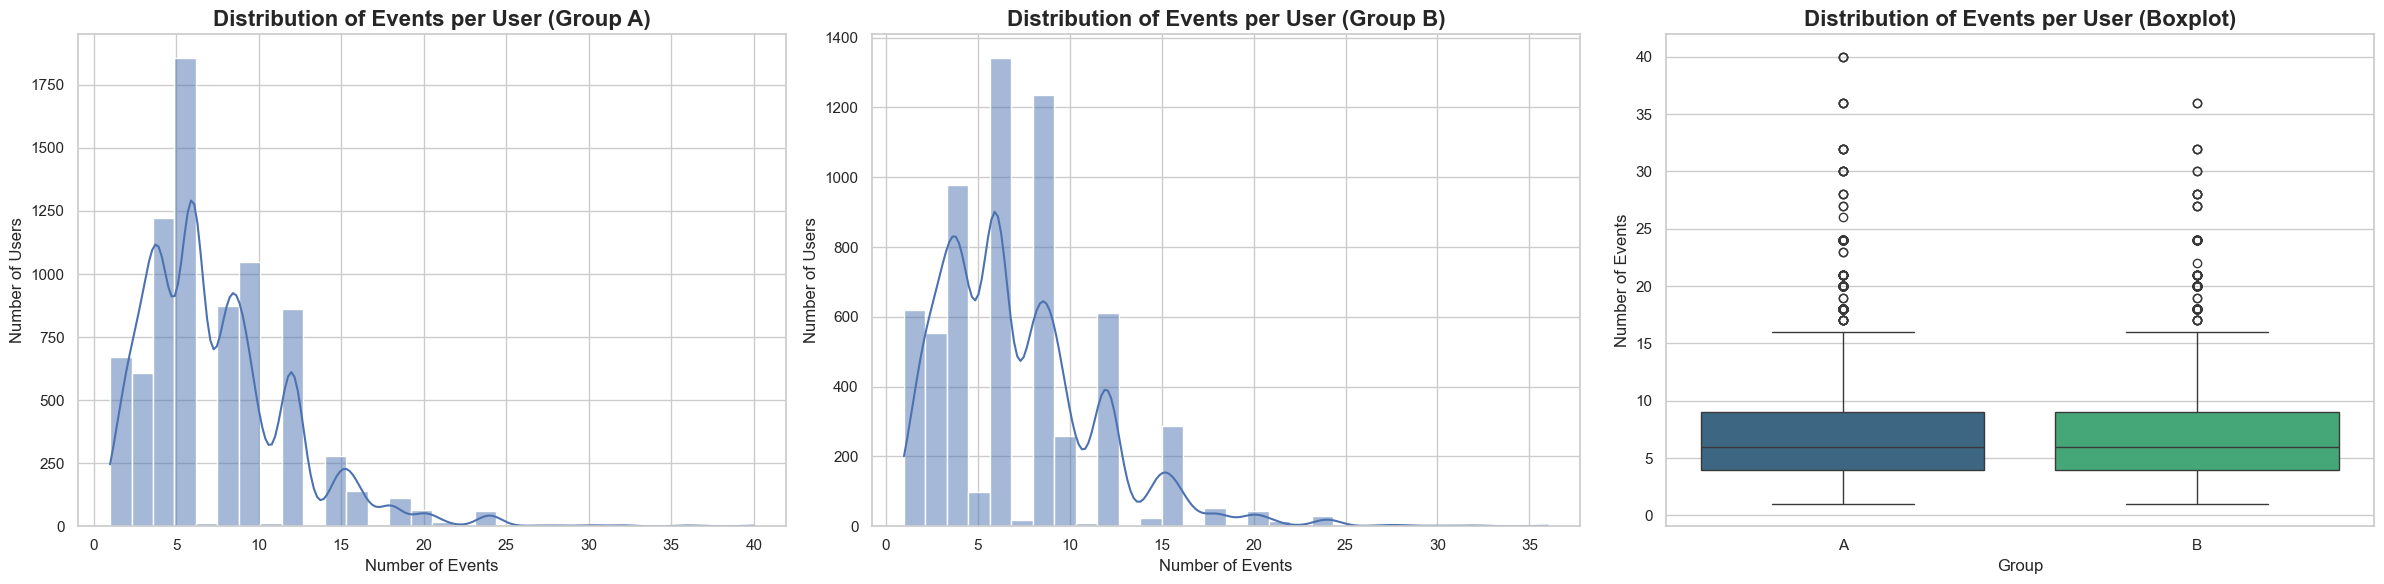

In [1009]:
# Crear una figura con tres subplots 
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Histograma grupo A
sns.histplot(events_per_user[events_per_user['group'] == 'A']['event_count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Events per User (Group A)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Number of Events', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)

# Histograma grupo B
sns.histplot(events_per_user[events_per_user['group'] == 'B']['event_count'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Events per User (Group B)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Number of Events', fontsize=12)
axes[1].set_ylabel('Number of Users', fontsize=12)

# Diagrama de caja
sns.boxplot(data=events_per_user, x='group', y='event_count', ax=axes[2], hue='group', palette='viridis', legend=False)
axes[2].set_title('Distribution of Events per User (Boxplot)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Group', fontsize=12)
axes[2].set_ylabel('Number of Events', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusiones**


- Tanto el grupo A como el grupo B tienen distribuciones similares de eventos por usuario, con la mayoría de los usuarios registrando entre 0 y 10 eventos, y un pico alrededor de los 5 eventos. Esto sugiere que ambos grupos se comportan de manera parecida en términos de frecuencia de eventos.


- Aunque las distribuciones parecen similares a simple vista, la prueba estadística de Mann-Whitney U encontroó una diferencia significativa. Es probable que estas diferencias sean sutiles y no tan evidentes en las gráficas.


- El diagrama de caja muestra que ambos grupos tienen una mediana similar, alrededor de 5 eventos. También tienen rangos intercuartílicos similares, lo que indica una dispersión comparable de los datos. Sin embargo, ambos grupos presentan valores atípicos, lo que implica que hay usuarios que registraron un número considerablemente mayor de eventos.

In [1010]:
# Prueba de Mann-Whitney U
group_a = events_per_user[events_per_user['group'] == 'A']['event_count']
group_b = events_per_user[events_per_user['group'] == 'B']['event_count']

stat, p = mannwhitneyu(group_a, group_b)
print(f'Estadístico de Mann-Whitney U: {stat}, p-valor: {p}')

Estadístico de Mann-Whitney U: 25458558.5, p-valor: 1.4211342403215935e-05


*Sin valores atípicos*

In [1011]:
# Identificar valores atípicos usando IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [1012]:
# Aplicar la función de eliminación de valores atípicos a cada grupo
group_a_no_outliers = remove_outliers(events_per_user[events_per_user['group'] == 'A'], 'event_count')
group_b_no_outliers = remove_outliers(events_per_user[events_per_user['group'] == 'B'], 'event_count')

In [1013]:
# Combinar los grupos sin valores atípicos
events_per_user_no_outliers = pd.concat([group_a_no_outliers, group_b_no_outliers])

# Imprimir una muestra de los datos
events_per_user_no_outliers.head()

,user_id,group,event_count
0,0002CE61FF2C4011,A,12
2,0010A1C096941592,A,12
4,002412F1EB3F6E38,A,6
5,002540BE89C930FB,A,9
7,003346BB64227D0C,A,3


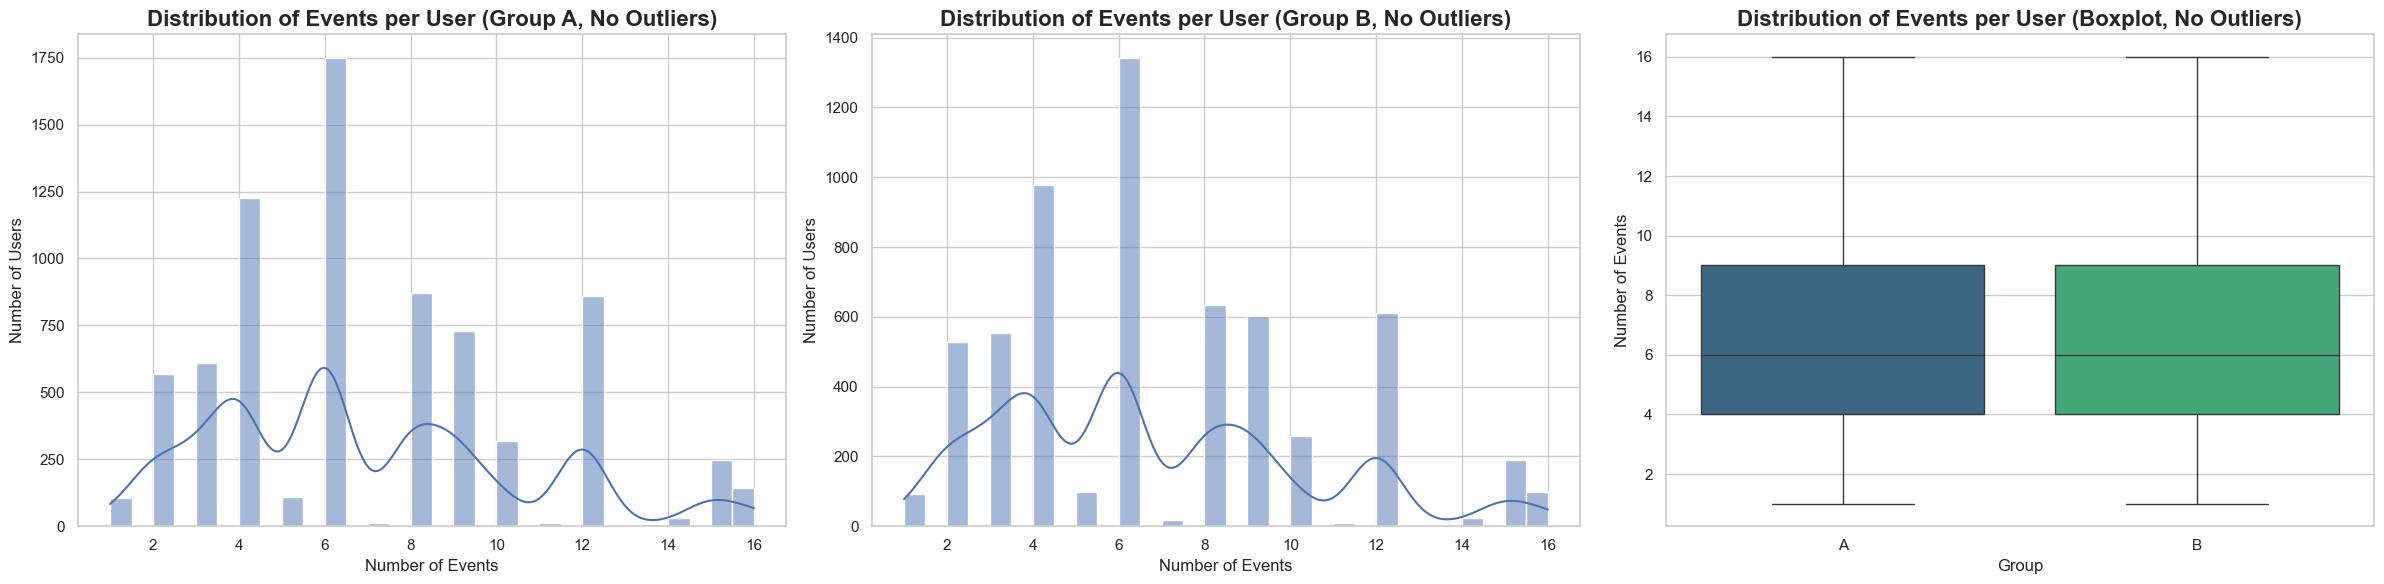

In [1014]:
# Crear una figura con tres subplots 
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Histograma grupo A
sns.histplot(group_a_no_outliers['event_count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Events per User (Group A, No Outliers)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Number of Events', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)

# Histograma grupo B
sns.histplot(group_b_no_outliers['event_count'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Events per User (Group B, No Outliers)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Number of Events', fontsize=12)
axes[1].set_ylabel('Number of Users', fontsize=12)

# Diagrama de caja
sns.boxplot(data=events_per_user_no_outliers, x='group', y='event_count', ax=axes[2], hue='group', palette='viridis', legend=False)
axes[2].set_title('Distribution of Events per User (Boxplot, No Outliers)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Group', fontsize=12)
axes[2].set_ylabel('Number of Events', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusiones**

- En los histogramas con densidad sobrepuesta, se aprecia que ambas distribuciones para el grupo A y el grupo B tienen una forma más definida y concentrada tras el tratamiento de los valores atípicos. Esto significa que los valores extremos ya no están influyendo en las colas de las distribuciones.


- Ambas distribuciones parecen más ajustadas alrededor de las medianas de sus respectivos grupos. Esto indica que la mayoría de los usuarios tienen un número de eventos similar dentro de cada grupo.


- El diagrama de caja muestra una comparación directa entre las medianas y las dispersiones de los dos grupos, pero ahora sin los valores extremos. Esto facilita identificar diferencias más sutiles entre los grupos.


- Aunque las distribuciones y las medianas parecen similares visualmente, los resultados previos de la prueba de Mann-Whitney U sugieren que las diferencias entre los grupos aún son estadísticamente significativas.

In [1015]:
# Prueba de Mann-Whitney U 
sampleA = group_a_no_outliers['event_count']
sampleB = group_b_no_outliers['event_count']

stat, p = stats.mannwhitneyu(sampleA, sampleB)
print(f'Estadístico de Mann-Whitney U: {stat}, p-valor: {p}')

Estadístico de Mann-Whitney U: 23720014.5, p-valor: 0.0004959698021684277


# ¿Hay usuarios que están presentes en ambas muestras?

In [1016]:
# Separar los grupos A y B
group_a_users = df_ab_participants[df_ab_participants['group'] == 'A']['user_id'].unique()
group_b_users = df_ab_participants[df_ab_participants['group'] == 'B']['user_id'].unique()

# Encontrar usuarios comunes
common_users = set(group_a_users) & set(group_b_users)

# Mostrar los resultados
if len(common_users) > 0:
    print(f"Hay {len(common_users)} usuarios presentes en ambos grupos.")
else:
    print("No hay usuarios presentes en ambos grupos.")

Hay 441 usuarios presentes en ambos grupos.


In [1017]:
# Manejar la exclusión de usuarios asignados a ambos grupos

# Identificar los usuarios comunes entre los dos grupos (A y B)
common_users = set(group_a_users) & set(group_b_users)

# Excluir los usuarios comunes del grupo B
df_ab_participants_clean = df_ab_participants[~df_ab_participants['user_id'].isin(common_users)]

# Excluir los eventos de los usuarios comunes
df_ab_events_clean = df_ab_events_period[~df_ab_events_period['user_id'].isin(common_users)]
df_filtered_events_clean = df_filtered_events[~df_filtered_events['user_id'].isin(common_users)]

# Verificación: cuántos usuarios fueron excluidos
print(f"Usuarios excluidos: {len(common_users)}")
print(f"Total de participantes después de la exclusión: {len(df_ab_participants_clean)}")
print(f"Total de eventos después de la exclusión: {len(df_ab_events_clean)}")

Usuarios excluidos: 441
Total de participantes después de la exclusión: 13643
Total de eventos después de la exclusión: 421070


**Conclusiones**

- Se identificaron 441 usuarios que participaron en ambos grupos (A y B). Esto podría haber introducido un sesgo en los resultados, ya que esos usuarios podrían haber estado sujetos a condiciones de ambos grupos.


- La exclusión de usuarios comunes garantiza que los grupos A y B sean completamente independientes, lo cual es fundamental para evitar problemas como influencia cruzada entre los grupos.

# ¿Cómo se distribuye el número de eventos entre los días?

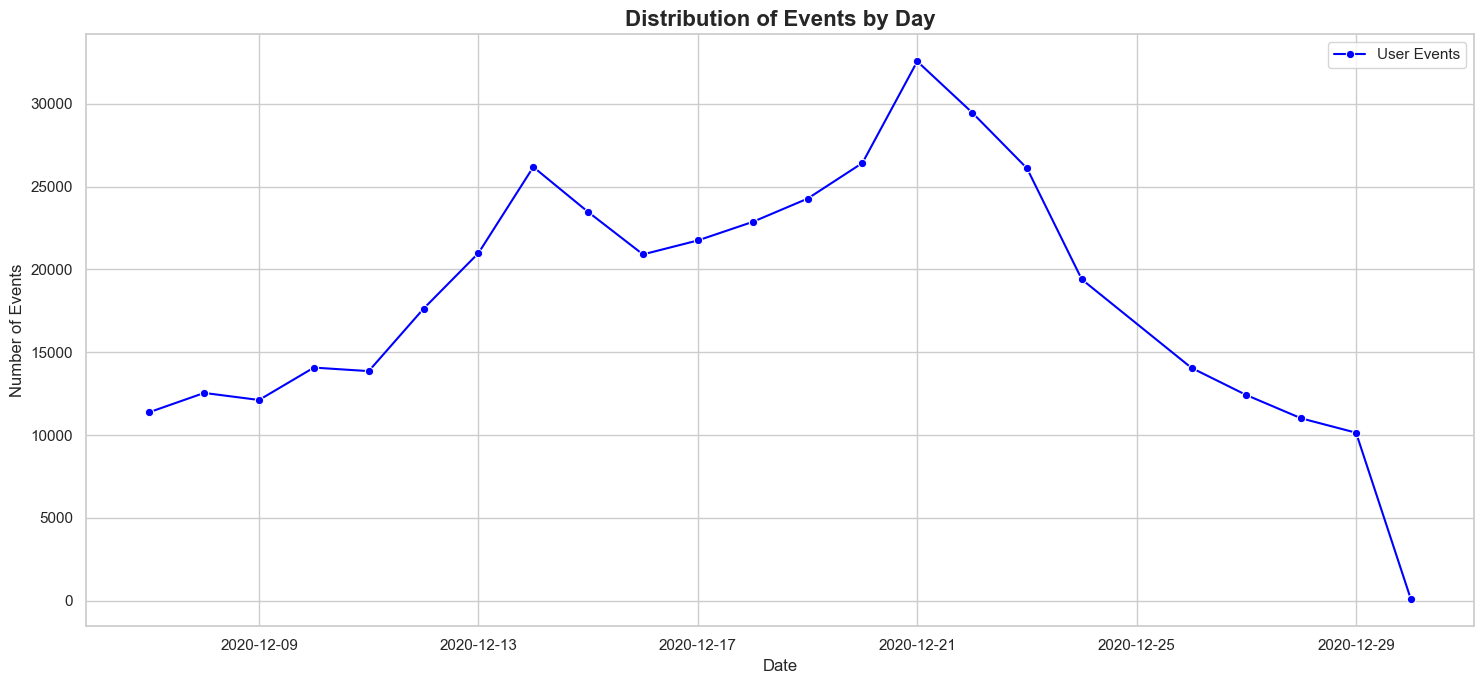

In [1018]:
# Agrupar por día y contar los eventos
events_by_day = df_ab_events_period.groupby('event_date')['event_name'].count()

# Visualizar la distribución
plt.figure(figsize=(15, 7))
sns.lineplot(x=events_by_day.index, y=events_by_day.values, marker='o', color='blue', label='User Events')

plt.title('Distribution of Events by Day', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.tight_layout()
plt.show()

**Conclusiones**

- Desde el 9 de diciembre, los eventos diarios comienzan alrededor de 10000 y muestran un crecimiento constante, alcanzado un pico notable de más de 30000 eventos cerca del 20 de diciembre de 2020.


- Después del punto máximo, el número de eventos experimenta una caída abrupta, finalizando por debajo de 5000 eventos el 29 de diciembre de 2020.


- Se observa una tendencia de crecimiento en la primera mitad del período analizado, seguida de un descenso pronunciado en la segunda mitad.


- La gráfica podría ser útil para analizar períodos de alta y baja actividad, proporcionando insights valiosos para planificar estrategias futuras o estudiar el impacto de eventos en las interacciones de los usuarios.

# ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

**Las peculiaridades en los datos que se deben tener en cuenta antes de iniciar la prueba A/B, basádo en el análisis que se ha realizado hasta ahora son:**


- Presencia de valores atípicos en el número de eventos por usuario: Ambos grupos (A y B) muestran una cantidad significativa de valores atípicos en el número de eventos por usuario.


- Si la asignación a los grupos A y B no fue aleatoria, podría haber un sesgo que afecte la comparabilidad de los dos grupos. En referencia a los 441 usuarios presentes en ambos grupos.


- Disminución en el número de eventos hacia el final del período de la prueba: Se observa una marcada disminución en el número de eventos hacia el final del período analizado, específicamente a partir de finales de diciembre de 2020 hasta principios de enero de 2021.


- Eventos de marketing durante el período de la prueba: Hubo múltiples eventos de marketing durante el período de la prueba, lo que podría haber influido en el comportamiento de los usuarios.

**ETAPA 4. Evaluar los resultados de la prueba A/B**

# ¿Qué puedes decir sobre los resultados de la prueba A/B?

In [1019]:
# Asegurar de que solo los usuarios que están presentes en ambos dataframes sean seleccionados

df_ab_new_users_with_group = df_ab_new_users_period.merge(df_ab_participants[['user_id', 'group']], on='user_id', how='left')

# Verificar si hay usuarios sin grupo asignado
missing_groups = df_ab_new_users_with_group[df_ab_new_users_with_group['group'].isna()]
if not missing_groups.empty:
    print(f"Usuarios sin grupo asignado: {len(missing_groups)}")

# Agrupar las conversiones por grupo y región/dispositivo
conversion_by_region_device = df_ab_new_users_with_group.groupby(['group', 'region', 'device']).size().unstack(fill_value=0)

# Mostrar la tabla de conversiones
print("Conversión por región y dispositivo:")
print(conversion_by_region_device)

# Crear una lista de fechas de los eventos de marketing
marketing_dates = pd.concat([df_ab_marketing_events['start_dt'], df_ab_marketing_events['finish_dt']])

#  Tener las conversiones diarias de los grupos A y B
df_conversion_day = df_ab_events_clean.groupby('event_date').size()

Usuarios sin grupo asignado: 27024
Conversión por región y dispositivo:
device        Android  Mac    PC  iPhone
group region                            
A     EU         3326  762  1991    1503
B     EU         2616  591  1430    1110


**Conclusiones**

- El hecho de que 27024 usuarios no tengan grupo asignado es preocupante, ya que eso significa que no están siendo considerados en la prueba A/B.


- En general, el grupo A muestra mayores conversiones en todas las categorías de dispositivo comparado con el grupo B. Esto podría sugerir que el grupo A tiene un rendimiento superior en términos de conversiones.

- Si la asignación a los grupos no fue aleatoria, esto podría estar afectando los resultados de la prueba A/B. La asignación no aleatoria podría llevar a un sesgo en la distribución de usuarios, lo que afectaría la comparabilidad entre los grupos.

# Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

In [1020]:
# Calcular el número total de usuarios en los grupos A y B
total_a = len(group_a_users)
total_b = len(group_b_users)

# Conversión en cada etapa para los dos grupos
group_a_conversion_page
group_a_conversion_cart
group_a_conversion_purchase

group_b_conversion_page
group_b_conversion_cart
group_b_conversion_purchase

# Identificar el número de conversiones por grupo y etapa
conversions_a = [
    group_a_conversion_page * total_a,
    group_a_conversion_cart * total_a,
    group_a_conversion_purchase * total_a
]

conversions_b = [
    group_b_conversion_page * total_b,
    group_b_conversion_cart * total_b,
    group_b_conversion_purchase * total_b
]

# Identificar el número total de usuarios en cada grupo 
nobs = [total_a, total_b]

# Etapas del embudo
stages = ['product_page', 'product_cart', 'purchase']

# Ejecutar prueba z en cada etapa
for i, stage in enumerate(stages):
    count = [conversions_a[i], conversions_b[i]]
    z_stat, p_val = proportions_ztest(count, nobs)
    
    print(f"Test Z para la etapa {stage}:")
    print(f"Z-Statistic: {z_stat}")
    print(f"P-Value: {p_val}\n")


Test Z para la etapa product_page:
Z-Statistic: 0.2986808269558177
P-Value: 0.7651835875168305

Test Z para la etapa product_cart:
Z-Statistic: -1.9168807864235846
P-Value: 0.055253078536584566

Test Z para la etapa purchase:
Z-Statistic: 1.3746357661500932
P-Value: 0.1692443944100982



**Pruebas de hipótesis**



*Evento 'product_page'*

¿Existen diferencias significativas en las tasas de conversión del evento **product_page** entre los grupos A y B?


H0 = No hay diferencia significativa en las conversiones entre los grupos A y B en la etapa **product_page**

HA = Existe una diferencia significativa en las conversiones entre los grupos A y B en la etapa **product_page**



*Evento 'product_cart'*

¿Existen diferencias significativas en las tasas de conversión del evento **product_car** entre los grupos A y B?


H0 = No hay diferencia significativa en las conversiones entre los grupos A y B en la etapa **product_cart**

HA = Existe una diferencia significativa en las conversiones entre los grupos A y B en la etapa **product_cart**



*Evento 'purchase'*

¿Existen diferencias significativas en las tasas de conversión del evento **purchase** entre los grupos A y B?


H0 = No hay diferencia significativa en las conversiones entre los grupos A y B en la etapa **purchase**

HA = Existe una diferencia significativa en las conversiones entre los grupos A y B en la etapa **purchase**

In [1021]:
# Definir un umbral de significancia
alpha = 0.05

# Inicializar los resultados de la pruebas Z para cada etapa del embudo
results = {
    'product_page': {'z_statistic': 0.2986808269558177, 'p_value': 0.7651835875168305},
    'product_cart': {'z_statistic': -1.9168807864235846, 'p_value': 0.055253078536584566},
    'purchase': {'z_statistic': 1.3746357661500932, 'p_value': 0.1692443944100982}
}

# Verificar mediante una función si se rechaza o no la hipótesis nula
def test_hypothesis(event, p_value):
    if p_value < alpha:
        print(f"Para la etapa {event}: Rechazamos la hipótesis nula (H₀). Hay una diferencia significativa entre los grupos.")
    else:
        print(f"Para la etapa {event}: No rechazamos la hipótesis nula (H₀). No hay diferencia significativa entre los grupos.")

# Llamar a la función para cada evento
for event, values in results.items():
    test_hypothesis(event, values['p_value'])

Para la etapa product_page: No rechazamos la hipótesis nula (H₀). No hay diferencia significativa entre los grupos.
Para la etapa product_cart: No rechazamos la hipótesis nula (H₀). No hay diferencia significativa entre los grupos.
Para la etapa purchase: No rechazamos la hipótesis nula (H₀). No hay diferencia significativa entre los grupos.


**Conclusiones**

*Evento 'product_page'*

- La diferencia entre los dos grupos en la etapa de 'product_page' no es estadísticamente significativa. El p-value es mucho mayor que el umbral común de 0.05, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula. Las diferencias entre los dos grupos en esta etapa de convesión pueden ser atribuibles al azar.


*Evento 'product_cart'*

- La diferencia en la conversión en la etapa de 'product_cart' es marginalmente significativa. El p-value está cerca del umbral de 0.05, lo que indica que hay una tendencia hacia una diferencia significativa, pero no es lo suficientemente fuerte como para rechazar la hipótesis nula con un nivel de confianza del 95%.


*Evento 'purchase'*

- Al igual que en la etapa de 'product_page, la diferencia entre los grupos en la etapa de 'purchase' no es estadísticamente significativa. El p-value es mucho mayor que el umbral de 0.05, lo que indica que no hay evidencia suficiente para afirmar que el nuevo embudo de pago ha tenido un impacto en la conversión en la compra.

**ETAPA 5. Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.**

**Conclusiones**


- Durante la etapa EDA los datos mostraron peculiaridades importantes como valores atípicos, solapamiento de usuarios entre grupos y eventos externos que puedieron haber influido en los resultados. Las situaciones atípicas identificadas sugieren la necesidad de un control más estricto en futuros experimentos para minimizar sesgos y garantizar una mayor fiabilidad en los datos analizados.


- Durante la etapa resultados de la prueba A/B se encontraron usuarios sin grupo asignado 27024, lo que pudo afectar la representatividad de los datos y las conclusiones del experimento. En ninguna de las etapas clave del embudo se encontraron diferencias estadísticamente significativas entre los grupos A y B. Aunque se observaron ligeras variaciones en las tasas de conversión, estas no alcanzaron los niveles requeridos para rechazar la hipótesis nula (H0).


**Recomendaciones**

- Mejorar el proceso de asignación de usuarios para evitar solapamientos entre grupos y garantizar la independencia de las muestras.


- Asegurarse de que la asignación sea completamente aleatoria para minimizar el sesgo en las muestras.


- Excluir valores atípicos desde el inicio para reducir su impacto en las métricas clave.


- Evitar realizar pruebas A/B durante períodos susceptibles a efectos estacionales o eventos externos, ya que estas pueden interferir con los resultados.


- Llevar un seguimiento detallado de estos eventos para poder cuantificar y mitigar su influencia.


- Profundizar en el análisis de conversiones por segmentos mediante pruebas estadísticas para explorar posibles áreas de mejora.


- Realizar pruebas adicionales enfocadas en los segmentos más prometedores o con resultados atípicos para extraer aprendizajes más específicos.


- Implementar un diseño iterativo para futuras pruebas A/B, utilizando los hallazgos actuales como base para ajustar y mejorar las metodologías.